In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("../datasets/kidney_disease.csv")
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
dataset.shape

(400, 26)

In [5]:
dataset.drop('id',axis=1,inplace=True)

In [6]:
dataset.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
dataset['packed_cell_volume'] = pd.to_numeric(dataset['packed_cell_volume'],errors="coerce")
dataset['white_blood_cell_count'] = pd.to_numeric(dataset['white_blood_cell_count'],errors="coerce")
dataset['red_blood_cell_count'] = pd.to_numeric(dataset['red_blood_cell_count'],errors="coerce")

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
numerical_col= [col for col in dataset.columns if dataset[col].dtype != 'object']
categorical_col= [col for col in dataset.columns if dataset[col].dtype == 'object']

In [12]:
numerical_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [13]:
categorical_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [14]:
for col in categorical_col:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [15]:
dataset['diabetes_mellitus'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
dataset['coronary_artery_disease'].replace(to_replace='\tno' , value='no',inplace=True)
dataset['class'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 

In [16]:
for col in categorical_col:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



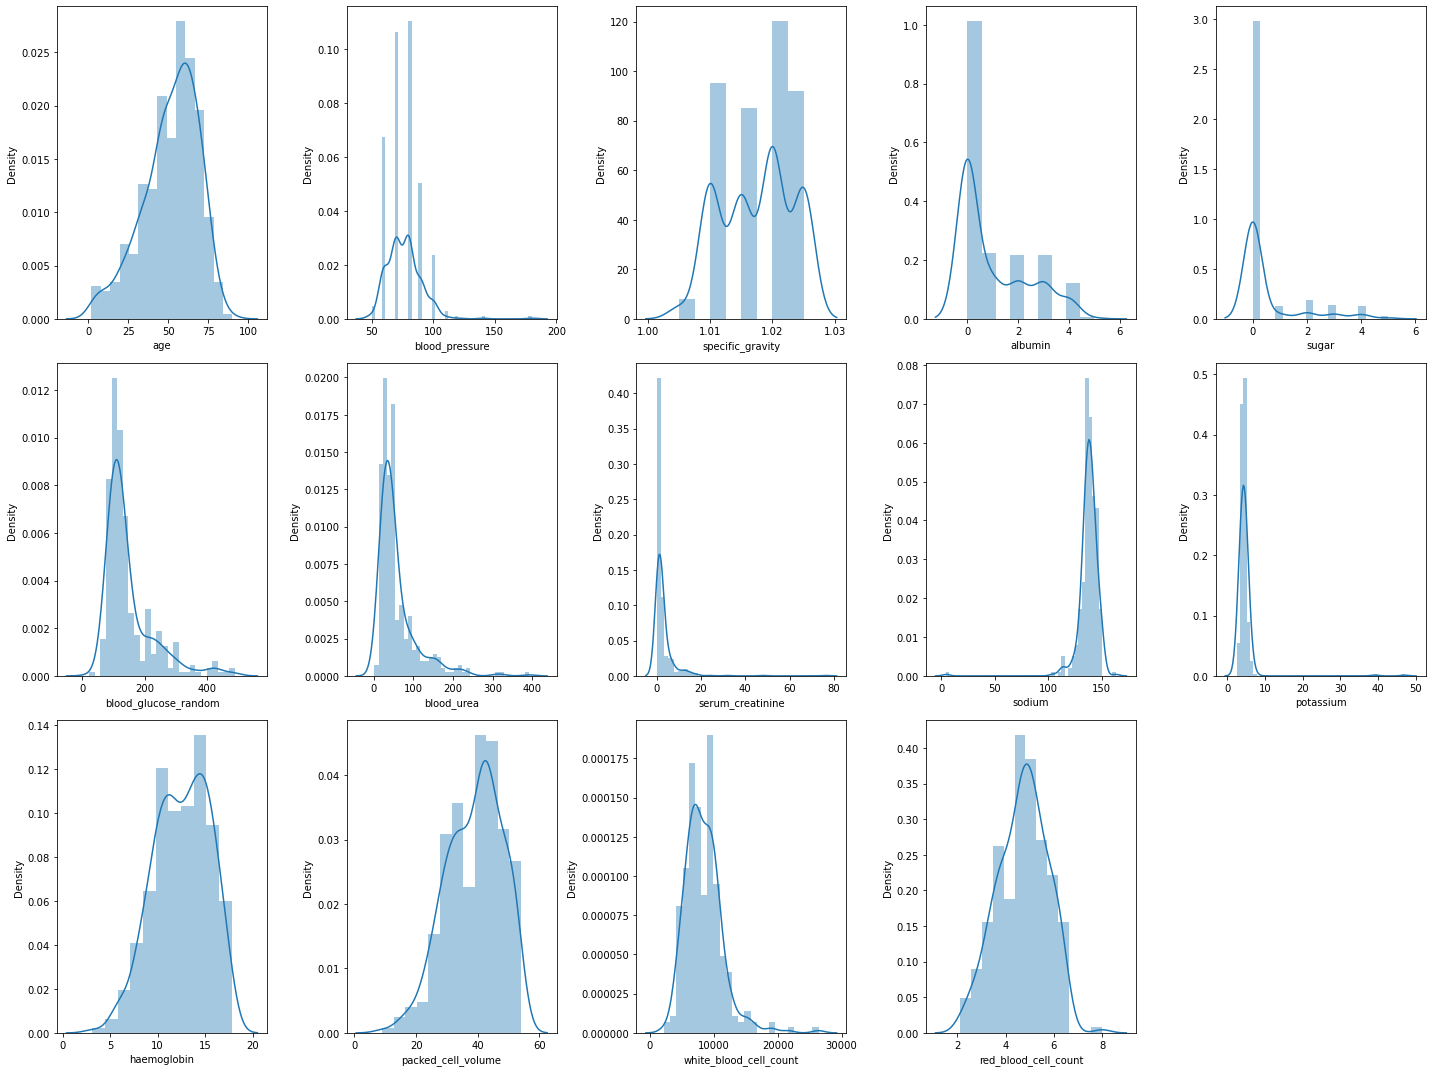

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [18]:
def handle_outlier(col):
    dataset[col] =np.log1p(dataset[col])

In [19]:

handle_outlier('blood_urea')
handle_outlier('sodium')
handle_outlier('potassium')
handle_outlier('serum_creatinine')
handle_outlier('sugar')

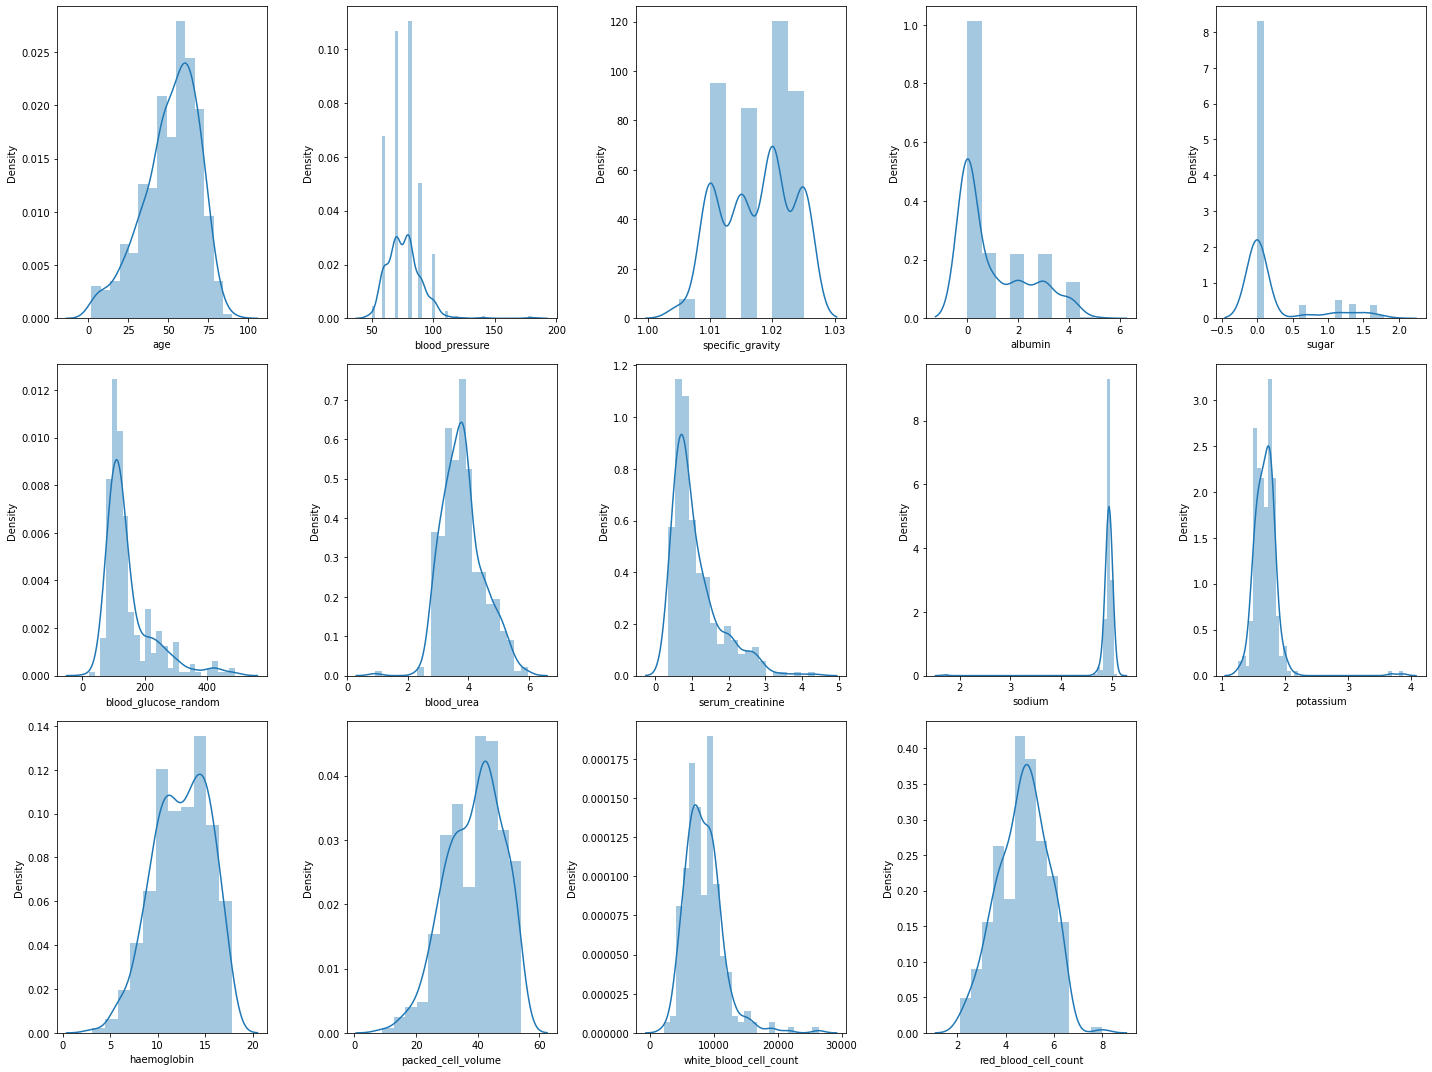

In [20]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [21]:
dataset.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:
def random_value_imputation(feature):
    random_sample = dataset[feature].dropna().sample(dataset[feature].isna().sum()) 
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] =dataset[feature].fillna(mode)

In [23]:
for col in numerical_col:
    random_value_imputation(col)

In [24]:
dataset[numerical_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [25]:
for col in categorical_col:
    impute_mode(col)

In [26]:
dataset[categorical_col].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [27]:
from sklearn.preprocessing  import LabelEncoder

encode = LabelEncoder()

for col in categorical_col:
    dataset[col]=encode.fit_transform(dataset[col])

In [28]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.000000,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.000000,1,1,0,0,133.0,...,38.0,6000.0,2.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,1.386294,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.000000,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.000000,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [29]:
X = dataset.drop(columns ='class' , axis=1)
Y = dataset['class']

In [30]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

feture_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

feture_el_model.fit(X,Y)
feture_el_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True, False,  True])

In [31]:
cols= X.columns
selected_feature = cols[feture_el_model.get_support()]

In [32]:
print('total_features {}' .format(X.shape[1]))
print('total_features {}' .format(len(selected_feature)))

total_features 24
total_features 13


In [33]:
X= X[selected_feature]

In [34]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model=LogisticRegression()

In [36]:
logistic_regression_model.fit(x_train,y_train)

LogisticRegression()

In [37]:
LR_prediction=logistic_regression_model.predict(x_test)

In [38]:
print('Logistic Regression')
print('Accuracy= ',accuracy_score(LR_prediction,y_test)*100)
print(classification_report(y_test,LR_prediction))

Logistic Regression
Accuracy=  98.33333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [39]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

In [40]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
DT_prediction=decision_tree_model.predict(x_test)


In [42]:
print('Decision Tree')
print('Accuracy= ',accuracy_score(DT_prediction,y_test)*100)
print(classification_report(y_test,DT_prediction))

Decision Tree
Accuracy=  97.5
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [43]:
from sklearn.svm import SVC
support_vector_model=SVC()

In [44]:
support_vector_model.fit(x_train,y_train)

SVC()

In [45]:
SVM_prediction=support_vector_model.predict(x_test)

In [46]:
print('Support Vector Machine')
print('Accuracy=',accuracy_score(y_test,SVM_prediction)*100)
print(classification_report(y_test,SVM_prediction))

Support Vector Machine
Accuracy= 87.5
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        76
           1       0.81      0.86      0.84        44

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier()

In [48]:
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
RF_predict=random_forest_model.predict(x_test)

In [50]:
print('Random Forest')
print('Accuracy=',accuracy_score(y_test,RF_predict)*100)
print(classification_report(y_test,RF_predict))

Random Forest
Accuracy= 98.33333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [94]:
random_forest_improved_model=RandomForestClassifier(n_estimators=10)
random_forest_improved_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [95]:
Rf_improved_predict=random_forest_improved_model.predict(x_test)

In [96]:
print('Improved Random Forest')
print('Accuracy=',accuracy_score(y_test,Rf_improved_predict)*100)
print(classification_report(y_test,Rf_improved_predict))

Improved Random Forest
Accuracy= 99.16666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [54]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()

In [55]:
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
KNN_prediction=KNN_model.predict(x_test)

In [57]:
print('KNN')
print('Accuracy=',accuracy_score(y_test,KNN_prediction)*100)
print(classification_report(y_test,KNN_prediction))

KNN
Accuracy= 90.83333333333333
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        76
           1       0.81      0.98      0.89        44

    accuracy                           0.91       120
   macro avg       0.90      0.92      0.90       120
weighted avg       0.92      0.91      0.91       120



In [58]:

import joblib

In [97]:
joblib.dump(random_forest_improved_model,'Improved_2_RandomForest-Model-Kidney_Disease.pkl')

['Improved_2_RandomForest-Model-Kidney_Disease.pkl']

In [60]:
x_test.columns

Index(['age', 'blood_pressure', 'albumin', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'aanemia'],
      dtype='object')

In [61]:
x_test

,age,blood_pressure,albumin,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,aanemia
209,19.0,70.0,0.0,424.0,3.988984,0.741937,11.5,48.0,4.7,0,0,0,0
280,47.0,80.0,2.0,93.0,3.526361,0.641854,13.3,52.0,5.2,0,0,0,0
33,60.0,100.0,2.0,140.0,4.025352,1.252763,10.1,29.0,2.7,1,0,1,0
210,59.0,100.0,4.0,255.0,4.890349,2.624669,7.3,20.0,3.9,1,1,0,1
93,73.0,100.0,3.0,295.0,4.510860,1.887070,9.2,30.0,3.2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,67.0,90.0,1.0,141.0,4.204693,1.435085,13.7,33.0,3.2,1,0,0,0
79,56.0,80.0,1.0,165.0,4.025352,1.029619,13.5,40.0,5.0,1,1,1,0
285,66.0,70.0,0.0,94.0,2.995732,0.530628,16.0,41.0,5.9,0,0,0,0
305,41.0,80.0,0.0,122.0,3.258097,0.587787,17.1,41.0,5.2,0,0,0,0


In [62]:
y_test


209    0
280    1
33     0
210    0
93     0
      ..
60     0
79     0
285    1
305    1
281    1
Name: class, Length: 120, dtype: int32

In [63]:
Rf_improved_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [64]:
dataset.corr(method='pearson')

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
age,1.000000,0.154804,-0.165392,0.118788,0.204381,-0.035167,-0.114913,0.155583,0.041741,0.158430,...,-0.177351,0.089118,-0.175455,0.390941,0.356496,0.229007,0.147314,0.101133,0.060110,-0.231105
blood_pressure,0.154804,1.000000,-0.166731,0.136369,0.188411,-0.153641,-0.160969,0.060671,0.112215,0.107724,...,-0.227293,0.048110,-0.195811,0.270344,0.225864,0.087252,0.175361,0.053219,0.183232,-0.296105
specific_gravity,-0.165392,-0.166731,1.000000,-0.383772,-0.289230,0.217660,0.310070,-0.268424,-0.204008,-0.281890,...,0.517413,-0.157769,0.406266,-0.363499,-0.365877,-0.133340,-0.236056,-0.265853,-0.227715,0.670699
albumin,0.118788,0.136369,-0.383772,1.000000,0.287838,-0.363452,-0.519331,0.387502,0.354957,0.263089,...,-0.442705,0.194278,-0.370377,0.468683,0.353517,0.237534,0.310465,0.438297,0.239592,-0.564423
sugar,0.204381,0.188411,-0.289230,0.287838,1.000000,-0.096627,-0.212217,0.181937,0.134554,0.590712,...,-0.167419,0.135012,-0.168174,0.288242,0.447142,0.257876,0.113486,0.142666,0.058324,-0.320558
red_blood_cells,-0.035167,-0.153641,0.217660,-0.363452,-0.096627,1.000000,0.377394,-0.102948,-0.184402,-0.121749,...,0.237583,0.011430,0.130127,-0.140538,-0.145646,-0.111493,-0.160868,-0.199285,-0.107625,0.282642
pus_cell,-0.114913,-0.160969,0.310070,-0.519331,-0.212217,0.377394,1.000000,-0.520118,-0.330401,-0.217847,...,0.397221,-0.083618,0.332009,-0.291719,-0.201032,-0.172295,-0.274985,-0.350227,-0.260566,0.375154
pus_cell_clumps,0.155583,0.060671,-0.268424,0.387502,0.181937,-0.102948,-0.520118,1.000000,0.275082,0.184458,...,-0.297685,0.147763,-0.195754,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
bacteria,0.041741,0.112215,-0.204008,0.354957,0.134554,-0.184402,-0.330401,0.275082,1.000000,0.075241,...,-0.201800,0.080283,-0.128142,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871
blood_glucose_random,0.158430,0.107724,-0.281890,0.263089,0.590712,-0.121749,-0.217847,0.184458,0.075241,1.000000,...,-0.226623,0.145123,-0.210176,0.331999,0.470343,0.181022,0.163294,0.090503,0.098020,-0.376965


In [65]:
x_test.columns

Index(['age', 'blood_pressure', 'albumin', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'aanemia'],
      dtype='object')

In [66]:
print('Original Features in the Dataset: ')
for i in dataset.columns:
    print(i)

Original Features in the Dataset: 
age
blood_pressure
specific_gravity
albumin
sugar
red_blood_cells
pus_cell
pus_cell_clumps
bacteria
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count
hypertension
diabetes_mellitus
coronary_artery_disease
appetite
peda_edema
aanemia
class


In [67]:
print('Features Selected after Feature Selection:')
for i in range(len(feture_el_model.get_support())):
               if feture_el_model.get_support()[i]==True:
                   print(dataset.columns[i])

Features Selected after Feature Selection:
age
blood_pressure
albumin
blood_glucose_random
blood_urea
serum_creatinine
haemoglobin
packed_cell_volume
red_blood_cell_count
hypertension
diabetes_mellitus
appetite
aanemia


In [68]:
x_test.head(50)

,age,blood_pressure,albumin,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,aanemia
209,19.0,70.0,0.0,424.0,3.988984,0.741937,11.5,48.0,4.7,0,0,0,0
280,47.0,80.0,2.0,93.0,3.526361,0.641854,13.3,52.0,5.2,0,0,0,0
33,60.0,100.0,2.0,140.0,4.025352,1.252763,10.1,29.0,2.7,1,0,1,0
210,59.0,100.0,4.0,255.0,4.890349,2.624669,7.3,20.0,3.9,1,1,0,1
93,73.0,100.0,3.0,295.0,4.510860,1.887070,9.2,30.0,3.2,1,1,1,0
84,59.0,70.0,3.0,76.0,5.231109,2.772589,7.1,22.0,2.1,1,0,1,1
329,33.0,60.0,0.0,80.0,3.258097,0.641854,14.1,48.0,5.1,0,0,0,0
94,65.0,70.0,0.0,93.0,4.204693,0.955511,11.6,36.0,3.9,0,1,0,0
266,55.0,80.0,0.0,133.0,2.890372,0.788457,13.2,41.0,5.3,0,0,0,0
126,70.0,90.0,0.0,144.0,4.836282,1.609438,12.0,37.0,4.5,1,1,1,0


In [69]:
y_test[0:50]

209    0
280    1
33     0
210    0
93     0
84     0
329    1
94     0
266    1
126    0
9      0
361    1
56     0
72     0
132    0
42     0
278    1
376    1
231    0
385    1
77     0
15     0
391    1
271    1
0      0
396    1
114    0
225    0
262    1
104    0
395    1
193    0
261    1
57     0
232    0
116    0
113    0
342    1
158    0
141    0
381    1
55     0
76     0
25     0
82     0
382    1
148    0
181    0
22     0
173    0
Name: class, dtype: int32